In [142]:
# imports
# Follow python style guidelines (pep-8) on the order of imports (https://pep8.org/#imports)

import os
import warnings
import zipfile
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [143]:
# List data files
os.listdir("/home/data")

['skoda.csv',
 'vw.csv',
 'vauxhall.csv',
 'merc.csv',
 'bmw.csv',
 'toyota.csv',
 'audi.csv',
 'cclass.csv',
 'focus.csv',
 'ford.csv',
 'hyundi.csv']

In [144]:
# load individual data files into a single dataframe, adding the brand as a column

data = []
for filename in os.listdir("data"):
    df = pd.read_csv(f"/home/data/{filename}")
    df["brand"] = filename.split(".csv")[0]
    data.append(df)

df = pd.concat(data)
df.reset_index(inplace=True, drop=True)

In [145]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,Octavia,2017,10550,Manual,25250,Petrol,150.0,54.3,1.4,skoda,NaN
1,Citigo,2018,8200,Manual,1264,Petrol,145.0,67.3,1.0,skoda,NaN
2,Octavia,2019,15650,Automatic,6825,Diesel,145.0,67.3,2.0,skoda,NaN
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165.0,51.4,2.0,skoda,NaN
4,Superb,2019,18350,Manual,10912,Petrol,150.0,40.9,1.5,skoda,NaN


In [146]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
108535,I30,2016,8680,Manual,25906,Diesel,NaN,78.4,1.6,hyundi,0.0
108536,I40,2015,7830,Manual,59508,Diesel,NaN,65.7,1.7,hyundi,30.0
108537,I10,2017,6830,Manual,13810,Petrol,NaN,60.1,1.0,hyundi,20.0
108538,Tucson,2018,13994,Manual,23313,Petrol,NaN,44.8,1.6,hyundi,145.0
108539,Tucson,2016,15999,Automatic,11472,Diesel,NaN,57.6,1.7,hyundi,125.0


In [147]:
df.shape

(108540, 11)

In [148]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,tax(£)
count,108540.000000,108540.000000,108540.000000,94327.000000,99187.000000,108540.000000,4860.000000
mean,2017.098028,16890.124046,23025.928469,120.256183,55.166825,1.661644,121.147119
std,2.130057,9756.266820,21176.423684,63.404805,16.138522,0.557058,58.003289
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000,125.000000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000,145.000000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000,145.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,555.000000


In [149]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
brand            object
tax(£)          float64
dtype: object

In [150]:
# Null values

df.isna().sum()

model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
tax              14213
mpg               9353
engineSize           0
brand                0
tax(£)          103680
dtype: int64

<AxesSubplot:>

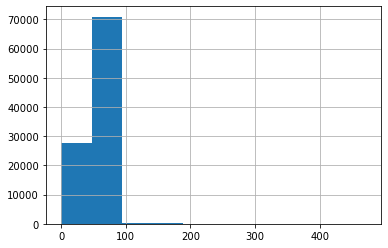

In [151]:
df.mpg.hist()

<AxesSubplot:>

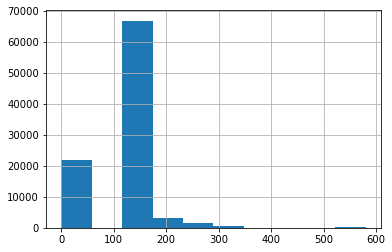

In [152]:
df.tax.hist()

<AxesSubplot:>

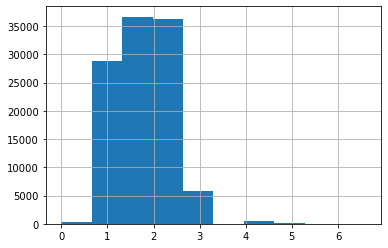

In [153]:
df.engineSize.hist()

<AxesSubplot:>

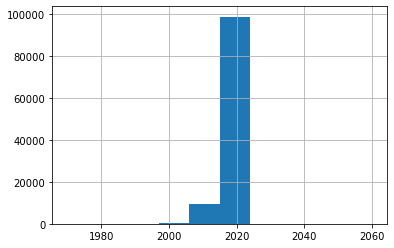

In [154]:
df.year.hist()

<AxesSubplot:>

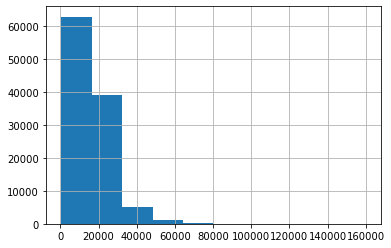

In [155]:
df.price.hist()

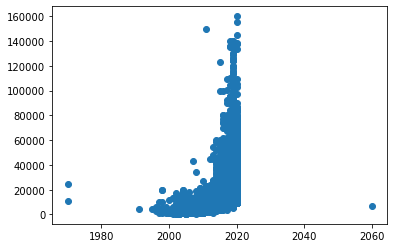

In [156]:
plt.scatter(df.sort_values(by="year").year, df.sort_values(by="year").price)

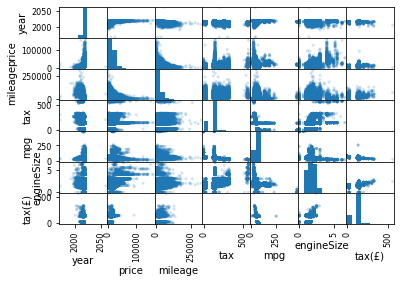

<Figure size 720x720 with 0 Axes>

In [157]:
pd.plotting.scatter_matrix(df, alpha=0.2)
plt.figure(figsize=(10,10))
plt.show()

<AxesSubplot:>

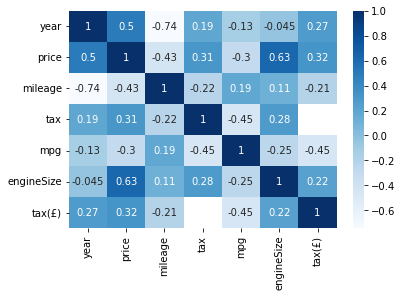

In [158]:

corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

**Data Exploration:**  
1 - data types  
2 - data distribution  
3 - null values and data imputation  
4 - outliers  
5 - normalization  
6 - correlation (with dependent and independent variables)  
7 - encode any categorical data to be used


In [161]:
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,Octavia,2017,10550,Manual,25250,Petrol,150.0,54.3,1.4,skoda,NaN
1,Citigo,2018,8200,Manual,1264,Petrol,145.0,67.3,1.0,skoda,NaN
2,Octavia,2019,15650,Automatic,6825,Diesel,145.0,67.3,2.0,skoda,NaN
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165.0,51.4,2.0,skoda,NaN
4,Superb,2019,18350,Manual,10912,Petrol,150.0,40.9,1.5,skoda,NaN


In [162]:
df = df[(df.year >= 2010) & (df.year <= 2020)]

In [163]:
df.year.value_counts()

2019    29955
2017    23686
2016    16948
2018    15092
2015     8359
2020     4657
2014     4377
2013     2818
2012      702
2011      477
2010      369
Name: year, dtype: int64

In [164]:
df.shape

(107440, 11)

In [165]:
outlier_indices = []
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)
iqr = q3 - q1 
outlier_find = iqr * 1.5
outlier_list = df[(df.price < q1 - outlier_find) | (df.price > q3 + outlier_find)].index

In [166]:
df = df.drop(outlier_list)

In [167]:
df.shape

(103341, 11)

In [170]:
df["age"] = 2020 - df.year

In [171]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£),age
0,Octavia,2017,10550,Manual,25250,Petrol,150.0,54.3,1.4,skoda,NaN,3
1,Citigo,2018,8200,Manual,1264,Petrol,145.0,67.3,1.0,skoda,NaN,2
2,Octavia,2019,15650,Automatic,6825,Diesel,145.0,67.3,2.0,skoda,NaN,1
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165.0,51.4,2.0,skoda,NaN,5
4,Superb,2019,18350,Manual,10912,Petrol,150.0,40.9,1.5,skoda,NaN,1


In [172]:
df=df[["model", "age", "transmission", "fuelType", "engineSize", "price"]]

In [173]:
df.head()

,model,age,transmission,fuelType,engineSize,price
0,Octavia,3,Manual,Petrol,1.4,10550
1,Citigo,2,Manual,Petrol,1.0,8200
2,Octavia,1,Automatic,Diesel,2.0,15650
3,Yeti Outdoor,5,Automatic,Diesel,2.0,14000
4,Superb,1,Manual,Petrol,1.5,18350


In [174]:
transmission = pd.get_dummies(df.transmission)

In [175]:
# transmission = transmission[["Automatic, Manual"]]


In [176]:
transmission.value_counts()

Automatic  Manual  Other  Semi-Auto
0          1       0      0            60549
           0       0      1            22491
1          0       0      0            20291
0          0       1      0               10
dtype: int64

In [177]:
df = df.merge(transmission, right_on=transmission.index, left_on=df.index)

In [178]:
df.head()

,key_0,model,age,transmission,fuelType,engineSize,price,Automatic,Manual,Other,Semi-Auto
0,0,Octavia,3,Manual,Petrol,1.4,10550,0,1,0,0
1,1,Citigo,2,Manual,Petrol,1.0,8200,0,1,0,0
2,2,Octavia,1,Automatic,Diesel,2.0,15650,1,0,0,0
3,3,Yeti Outdoor,5,Automatic,Diesel,2.0,14000,1,0,0,0
4,4,Superb,1,Manual,Petrol,1.5,18350,0,1,0,0


In [179]:
df = df[['model', 'age', 'transmission', 'fuelType', 'engineSize', 'price', 'Automatic', 'Manual', 'Other', 'Semi-Auto']]

In [180]:
df.columns

Index(['model', 'age', 'transmission', 'fuelType', 'engineSize', 'price',
       'Automatic', 'Manual', 'Other', 'Semi-Auto'],
      dtype='object')

In [181]:
df = df[df.Other != 1]

In [182]:
df = df[['model', 'age', 'transmission', 'fuelType', 'engineSize', 'price', 'Automatic', 'Manual', 'Semi-Auto']]

In [183]:
df.head()

,model,age,transmission,fuelType,engineSize,price,Automatic,Manual,Semi-Auto
0,Octavia,3,Manual,Petrol,1.4,10550,0,1,0
1,Citigo,2,Manual,Petrol,1.0,8200,0,1,0
2,Octavia,1,Automatic,Diesel,2.0,15650,1,0,0
3,Yeti Outdoor,5,Automatic,Diesel,2.0,14000,1,0,0
4,Superb,1,Manual,Petrol,1.5,18350,0,1,0


In [184]:
fuelType = pd.get_dummies(df.fuelType)

In [185]:
fuelType

,Diesel,Electric,Hybrid,Other,Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
103336,1,0,0,0,0
103337,1,0,0,0,0
103338,0,0,0,0,1
103339,0,0,0,0,1


In [186]:
fuelType.value_counts()

Diesel  Electric  Hybrid  Other  Petrol
0       0         0       0      1         57520
1       0         0       0      0         42425
0       0         1       0      0          3136
                  0       1      0           244
        1         0       0      0             6
dtype: int64

In [187]:
df = df.merge(fuelType, right_on=fuelType.index, left_on=df.index)

In [188]:
df

,key_0,model,age,transmission,fuelType,engineSize,price,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,0,Octavia,3,Manual,Petrol,1.4,10550,0,1,0,0,0,0,0,1
1,1,Citigo,2,Manual,Petrol,1.0,8200,0,1,0,0,0,0,0,1
2,2,Octavia,1,Automatic,Diesel,2.0,15650,1,0,0,1,0,0,0,0
3,3,Yeti Outdoor,5,Automatic,Diesel,2.0,14000,1,0,0,1,0,0,0,0
4,4,Superb,1,Manual,Petrol,1.5,18350,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103326,103336,I30,4,Manual,Diesel,1.6,8680,0,1,0,1,0,0,0,0
103327,103337,I40,5,Manual,Diesel,1.7,7830,0,1,0,1,0,0,0,0
103328,103338,I10,3,Manual,Petrol,1.0,6830,0,1,0,0,0,0,0,1
103329,103339,Tucson,2,Manual,Petrol,1.6,13994,0,1,0,0,0,0,0,1


In [189]:
df = df[df.Electric != 1]
df = df[df.Other != 1]
df = df[df.Hybrid != 1]

In [190]:
df.columns

Index(['key_0', 'model', 'age', 'transmission', 'fuelType', 'engineSize',
       'price', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel', 'Electric',
       'Hybrid', 'Other', 'Petrol'],
      dtype='object')

In [191]:
df = df[['model', 'age', 'engineSize',
       'price', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
        'Petrol']]

In [192]:
df.head()

,model,age,engineSize,price,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,Octavia,3,1.4,10550,0,1,0,0,1
1,Citigo,2,1.0,8200,0,1,0,0,1
2,Octavia,1,2.0,15650,1,0,0,1,0
3,Yeti Outdoor,5,2.0,14000,1,0,0,1,0
4,Superb,1,1.5,18350,0,1,0,0,1


In [193]:
df.to_csv("data_clean_lc.csv", compression="gzip")

In [194]:
df.model.value_counts()

 Focus      9877
 C Class    6851
 Fiesta     6486
 Golf       4708
 Corsa      3396
            ... 
200            1
 Ranger        1
180            1
 R Class       1
220            1
Name: model, Length: 168, dtype: int64

In [195]:
#######

In [196]:
data = df[['age', 'engineSize',
       'price', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
        'Petrol']]

In [198]:
data.head()

,age,engineSize,price,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,3,1.4,10550,0,1,0,0,1
1,2,1.0,8200,0,1,0,0,1
2,1,2.0,15650,1,0,0,1,0
3,5,2.0,14000,1,0,0,1,0
4,1,1.5,18350,0,1,0,0,1


In [199]:
X = data[['age', 'engineSize',
        'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
        'Petrol']]

In [200]:
y = data["price"]

In [201]:
# Baseline model. Predict price based on price average by car age

In [202]:
age_base_prediction = df.groupby("age").mean()

In [203]:
age_base_prediction = age_base_prediction["price"]

In [204]:
age_base_prediction

age
0     23800.058239
1     21114.948417
2     15477.629908
3     14039.964181
4     13110.853662
5     11476.681418
6      9851.019645
7      8429.079869
8      7448.929496
9      6447.544681
10     5187.675824
Name: price, dtype: float64

In [205]:
baseline = df.copy()

In [206]:
baseline.head()

,model,age,engineSize,price,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,Octavia,3,1.4,10550,0,1,0,0,1
1,Citigo,2,1.0,8200,0,1,0,0,1
2,Octavia,1,2.0,15650,1,0,0,1,0
3,Yeti Outdoor,5,2.0,14000,1,0,0,1,0
4,Superb,1,1.5,18350,0,1,0,0,1


In [208]:
baseline = baseline.merge(age_base_prediction, left_on=df.age, right_on=age_base_prediction.index)

In [209]:
baseline

,key_0,model,age,engineSize,price_x,Automatic,Manual,Semi-Auto,Diesel,Petrol,price_y
0,3,Octavia,3,1.4,10550,0,1,0,0,1,14039.964181
1,3,Yeti Outdoor,3,2.0,13250,1,0,0,1,0,14039.964181
2,3,Octavia,3,2.0,18990,0,1,0,0,1,14039.964181
3,3,Octavia,3,1.6,8695,0,1,0,1,0,14039.964181
4,3,Fabia,3,1.0,11290,0,1,0,0,1,14039.964181
...,...,...,...,...,...,...,...,...,...,...,...
99940,10,IX35,10,2.0,9495,0,1,0,1,0,5187.675824
99941,10,I30,10,1.4,2895,0,1,0,0,1,5187.675824
99942,10,Santa Fe,10,2.2,6995,0,1,0,1,0,5187.675824
99943,10,IX20,10,1.4,4495,0,1,0,0,1,5187.675824


In [210]:
# performance metric of baseline model

In [211]:
r2_score(baseline.price_x, baseline.price_y)

0.3452811931304316

In [212]:
df.columns

Index(['model', 'age', 'engineSize', 'price', 'Automatic', 'Manual',
       'Semi-Auto', 'Diesel', 'Petrol'],
      dtype='object')

In [213]:
df = df [['age', 'engineSize', 'price', 'Automatic', 'Manual',
       'Semi-Auto', 'Diesel', 'Petrol']]

In [214]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [215]:
X.shape, y.shape

((99945, 7), (99945,))

In [216]:
# Split the dataset into training and test (validation) datasets

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79956, 7), (19989, 7), (79956,), (19989,))

In [220]:
# Linear regression Moel

In [221]:
reg = LinearRegression().fit(X_train, y_train)

In [222]:
# Make predictions on the test dataset and calculate performance metric (r squared) 

In [223]:
y_hat = reg.predict(X_test)

In [224]:
r2_score(y_test.values, y_hat)

0.736133375947708

In [225]:
reg.coef_

array([-2198.08137125,  6966.23906248,   988.39087879, -2819.81649563,
        1831.42561685,  -226.8494102 ,   226.8494102 ])

In [226]:
reg.intercept_

11893.356397521624

In [227]:
X_train.columns

Index(['age', 'engineSize', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
       'Petrol'],
      dtype='object')

In [228]:
# Try regularized regression (L1 (lasso) and L2 (ridge))

In [229]:
from sklearn.linear_model import Ridge, Lasso

In [230]:
reg_lasso = Lasso().fit(X_train, y_train)
reg_ridge = Ridge().fit(X_train, y_train)

In [231]:
y_hat_ridge = reg_ridge.predict(X_test)
y_hat_lasso = reg_lasso.predict(X_test)

In [232]:
r2_score(y_test.values, y_hat_ridge)

0.7361333261190769

In [233]:
r2_score(y_test.values, y_hat_lasso)

0.7361315043461412

In [234]:
sorted(list((zip(X_train.columns, reg_lasso.coef_))), key=lambda x: x[1])

[('Manual', -3807.992048626744),
 ('age', -2198.0181643676465),
 ('Diesel', -444.18874736519695),
 ('Automatic', 0.0),
 ('Petrol', 4.354262394941497e-12),
 ('Semi-Auto', 838.8614034977436),
 ('engineSize', 6957.825225353804)]

In [235]:
reg_ridge.predict(X_test)

array([22202.83332215,  9672.58167156, 12458.83746882, ...,
       14068.7114388 , 20580.98323512,  9672.58167156])

In [236]:
X_test.shape

(19989, 7)

In [237]:
reg_ridge.predict(X_test).shape

(19989,)

In [238]:
# convert the "brand" 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = LabelEncoder()
le.fit(df['brand'])
le.transform(df['brand'])
df['brand'] = le.transform(df['brand'])

KeyError: 'brand'

In [242]:
car = X_test.iloc[0]

In [243]:
fake_car = {'brand':[1],'age':[3], 'engineSize':[2.0], 'Automatic':[1], 'Manual':[0], 'Semi-Auto':[0], 'Diesel':[0],
       'Petrol':[1]}

In [244]:
fake_car_df = pd.DataFrame(fake_car)

In [245]:
fake_car_df

,brand,age,engineSize,Automatic,Manual,Semi-Auto,Diesel,Petrol
0,1,3,2.0,1,0,0,0,1


In [247]:
fake_car = {'age':[3], 'engineSize':[2.0], 'Automatic':[1], 'Manual':[0], 'Semi-Auto':[0], 'Diesel':[0],
       'Petrol':[1]}

In [248]:
reg_ridge.predict(fake_car_df)

/usr/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- brand
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 8 features, but Ridge is expecting 7 features as input.

In [241]:
pd.DataFrame(car).transpose()

NameError: name 'car' is not defined

In [158]:
reg_ridge.predict(X_test)[0]

18408.353071466645

In [159]:
X_test.columns

Index(['age', 'engineSize', 'Automatic', 'Manual', 'Semi-Auto', 'Diesel',
       'Petrol'],
      dtype='object')

In [161]:
# Decision tree model


In [346]:
from sklearn.ensemble import RandomForestRegressor

In [347]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [348]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [349]:
# make predictions on the test dataset and calculate performance metric (r squared)

In [350]:
rf_predictions = rf.predict(X_test)

In [351]:
r2_score(y_test.values, rf_predictions)

0.8144590248527082

In [352]:
# Feature importance

In [353]:
sorted(list(zip(X_train.columns, rf.feature_importances_)), key=lambda x:x[1], reverse=True)

[('Manual', 0.4230909894814172),
 ('age', 0.3530797691780288),
 ('engineSize', 0.212266276664146),
 ('Petrol', 0.004629305759592702),
 ('Diesel', 0.004229868574822332),
 ('Automatic', 0.001363743049354799),
 ('Semi-Auto', 0.001340047292638141)]

In [354]:
# Random Search  hyperparameters optimization

In [223]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [224]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [0]:
rf_random.best_params_

In [0]:
# Gridsearch hyperparameters optimization

In [244]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 80], #, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 200] #, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [247]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.8s
[CV]

In [264]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [0]:
# get the best model as determined by the search

In [263]:
best_grid = grid_search.best_estimator_

In [0]:
# make predictions on the test dataset

In [262]:
y_hat_gs = best_grid.predict(X_test)

In [0]:
# calculate performance metric

In [257]:
r2_score(y_test, y_hat_gs)

0.8346037888200757

In [0]:
# Neural net model

In [225]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [226]:
model = Sequential()

model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu"))

model.add(Dense(1))

model.compile(optimizer= "adam", loss = "mse")

2022-04-12 12:23:35.711810: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-12 12:23:35.712175: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [229]:
model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), batch_size = 250, epochs = 200)

Epoch 1/200
333/333 [==============================] - 1s 2ms/step - loss: 381864800.0000 - val_loss: 384956640.0000
Epoch 2/200
333/333 [==============================] - 0s 1ms/step - loss: 356081376.0000 - val_loss: 294820832.0000
Epoch 3/200
333/333 [==============================] - 0s 1ms/step - loss: 188661776.0000 - val_loss: 135754368.0000
Epoch 4/200
333/333 [==============================] - 0s 955us/step - loss: 118430560.0000 - val_loss: 108787944.0000
Epoch 5/200
333/333 [==============================] - 0s 973us/step - loss: 93998552.0000 - val_loss: 85726000.0000
Epoch 6/200
333/333 [==============================] - 0s 1ms/step - loss: 72653104.0000 - val_loss: 65552644.0000
Epoch 7/200
333/333 [==============================] - 0s 1ms/step - loss: 54421816.0000 - val_loss: 48965512.0000
Epoch 8/200
333/333 [==============================] - 0s 1ms/step - loss: 40613816.0000 - val_loss: 37632004.0000
Epoch 9/200
333/333 [==============================] - 0s 1ms/step -

In [230]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

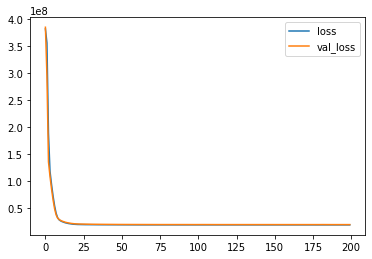

In [231]:
loss.plot()

In [234]:
predictArray = model.predict(X_test)
# mean_absolute_error(y_test, predictArray)

In [233]:
r2_score(y_test, predictArray)

0.7988190745605324

In [0]:
sklearn.metrics.mean_absolute_percentage_error